In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## A. Importing and cleaning the data

In [3]:

df=pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t', low_memory=False)

In [4]:
df.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#check data set info
#there are 356027 rows and 163 columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


In [6]:
#detecting missing values
df.isnull().sum()

code                                        26
url                                         26
creator                                      3
created_t                                    3
created_datetime                            10
last_modified_t                              0
last_modified_datetime                       0
product_name                             17512
generic_name                            298313
quantity                                236742
packaging                               266068
packaging_tags                          266068
brands                                   29050
brands_tags                              29070
categories                              252728
categories_tags                         252752
categories_en                           252726
origins                                 330977
origins_tags                            331015
manufacturing_places                    314019
manufacturing_places_tags               314026
labels       

In [7]:
#there are many columns where almost all entries are null. Let's keep columns with ~70% values, i.e. ~250 000 entries

df.dropna(thresh=250000, axis=1, inplace=True)

In [8]:
#detecting missing values again to see the difference

df.isnull().sum()

code                                           26
url                                            26
creator                                         3
created_t                                       3
created_datetime                               10
last_modified_t                                 0
last_modified_datetime                          0
product_name                                17512
brands                                      29050
brands_tags                                 29070
countries                                     275
countries_tags                                275
countries_en                                  275
ingredients_text                            72134
additives_n                                 72160
additives                                   72202
ingredients_from_palm_oil_n                 72160
ingredients_that_may_be_from_palm_oil_n     72160
nutrition_grade_fr                         101171
states                                         52


In [9]:
df.info()

#after cleaning there are less columns in data set, 32 instead of 163
#but there are still a lot of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Data columns (total 32 columns):
code                                       356001 non-null object
url                                        356001 non-null object
creator                                    356024 non-null object
created_t                                  356024 non-null object
created_datetime                           356017 non-null object
last_modified_t                            356027 non-null object
last_modified_datetime                     356027 non-null object
product_name                               338515 non-null object
brands                                     326977 non-null object
brands_tags                                326957 non-null object
countries                                  355752 non-null object
countries_tags                             355752 non-null object
countries_en                               355752 non-null object
ingredients_text               

In [10]:
#command to drop rows with all null values

df.dropna(how='all', inplace=True)

In [11]:
#the sum result hasn't changed, it means that there weren't rows with all null values 

df.isnull().sum()

code                                           26
url                                            26
creator                                         3
created_t                                       3
created_datetime                               10
last_modified_t                                 0
last_modified_datetime                          0
product_name                                17512
brands                                      29050
brands_tags                                 29070
countries                                     275
countries_tags                                275
countries_en                                  275
ingredients_text                            72134
additives_n                                 72160
additives                                   72202
ingredients_from_palm_oil_n                 72160
ingredients_that_may_be_from_palm_oil_n     72160
nutrition_grade_fr                         101171
states                                         52


In [12]:
#command to check the list of columns

df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_en',
       'ingredients_text', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_en', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

In [13]:
#let's drop the columns which will not be used in the analysis

df.drop(['code', 'url', 'creator', 'created_t', 'last_modified_t', 'brands_tags', 'countries', 'countries_tags', 'additives_n', 'additives', 'ingredients_that_may_be_from_palm_oil_n', 'states', 'states_tags', 'states_en','nutrition_grade_fr'], axis=1, inplace=True)

In [14]:
#Check the result

df.head()

,created_datetime,last_modified_datetime,product_name,brands,countries_en,ingredients_text,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,2243.0,28.57,28.57,64.29,14.29,3.57,0.00000,0.000,14.0,14.0
2,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,1941.0,17.86,0.00,60.71,17.86,17.86,0.63500,0.250,0.0,0.0
3,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,United States,"Organic hazelnuts, organic cashews, organic wa...",0.0,2540.0,57.14,5.36,17.86,3.57,17.86,1.22428,0.482,12.0,12.0
4,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,United States,Organic polenta,0.0,1552.0,1.43,NaN,77.14,NaN,8.57,NaN,NaN,NaN,NaN


In [15]:
#lets start look at missing data that we still have. Start with column 'product_name' 

df['product_name'].head(10)

0                   Farine de blé noir
1       Banana Chips Sweetened (Whole)
2                              Peanuts
3               Organic Salted Nut Mix
4                      Organic Polenta
5    Breadshop Honey Gone Nuts Granola
6        Organic Long Grain White Rice
7                       Organic Muesli
8         Organic Dark Chocolate Minis
9                Organic Sunflower Oil
Name: product_name, dtype: object

In [16]:
#check null values in column 'product_name'. 

df[df['product_name'].isnull()]

#We can see that almost all values in many other columns are null as well. So we could drop these rows

,created_datetime,last_modified_datetime,product_name,brands,countries_en,ingredients_text,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
49,2016-03-17T18:17:10Z,2016-03-17T18:17:18Z,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,2016-12-27T14:08:50Z,2017-07-29T13:36:53Z,NaN,Heinz,France,NaN,NaN,1215.0,23.8,1.8,18.5,17.0,1.3,1.7,0.669291,14.0,14.0
234,2017-06-03T10:01:48Z,2017-06-03T10:01:59Z,NaN,test,Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,2016-06-26T09:31:58Z,2017-04-23T09:29:07Z,NaN,NaN,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,2016-02-04T18:11:33Z,2016-02-04T21:35:27Z,NaN,NaN,Portugal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,2016-07-29T19:13:23Z,2016-07-29T19:13:33Z,NaN,NaN,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,2016-05-25T20:48:14Z,2016-05-25T20:48:15Z,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,2016-02-22T11:43:49Z,2016-02-22T11:43:52Z,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,2015-03-03T13:06:13Z,2015-03-03T13:06:14Z,NaN,NaN,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434,2016-02-25T14:31:21Z,2016-02-25T15:49:38Z,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#drop rows with NaN value in "product_name" column

df=df.dropna(subset=['product_name'])

In [18]:
df.isnull().sum()

#no null values anymore in "product_name" column

created_datetime                  10
last_modified_datetime             0
product_name                       0
brands                         13873
countries_en                     219
ingredients_text               56418
ingredients_from_palm_oil_n    56444
energy_100g                    46534
fat_100g                       62359
saturated-fat_100g             77644
carbohydrates_100g             62644
sugars_100g                    62424
proteins_100g                  47698
salt_100g                      51809
sodium_100g                    51846
nutrition-score-fr_100g        86445
nutrition-score-uk_100g        86445
dtype: int64

In [19]:
df.info()

#we can note that  number of entries is now 338515 instead of 356026

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338515 entries, 0 to 356026
Data columns (total 17 columns):
created_datetime               338505 non-null object
last_modified_datetime         338515 non-null object
product_name                   338515 non-null object
brands                         324642 non-null object
countries_en                   338296 non-null object
ingredients_text               282097 non-null object
ingredients_from_palm_oil_n    282071 non-null float64
energy_100g                    291981 non-null float64
fat_100g                       276156 non-null float64
saturated-fat_100g             260871 non-null float64
carbohydrates_100g             275871 non-null float64
sugars_100g                    276091 non-null float64
proteins_100g                  290817 non-null float64
salt_100g                      286706 non-null float64
sodium_100g                    286669 non-null float64
nutrition-score-fr_100g        252070 non-null float64
nutrition-score

In [20]:
#let's contimue with column 'brands'. First have a look at NaN values in column 

df[df['brands'].isnull()]



,created_datetime,last_modified_datetime,product_name,brands,countries_en,ingredients_text,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,2243.0,28.57,28.57,64.29,14.29,3.57,0.00000,0.000000,14.0,14.0
47,2015-06-17T08:45:04Z,2015-06-17T10:11:54Z,Filet de bœuf,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,2016-08-26T15:03:02Z,2016-08-26T15:03:02Z,Marks % Spencer 2 Blueberry Muffins,NaN,United Kingdom,pasteurized free range egg.sugar.blueberries (...,0.0,1513.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,2015-01-25T21:35:01Z,2017-05-15T05:05:41Z,Lion Peanut x2,NaN,"France,United States",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,2017-03-09T14:33:16Z,2017-03-09T14:33:16Z,Organic Raw Buckwheat Groats,NaN,United States,Organic raw buckwheat groats,0.0,1393.0,3.33,NaN,71.11,NaN,13.33,NaN,NaN,NaN,NaN
138,2015-01-25T21:36:13Z,2016-09-10T20:08:02Z,Twix x2,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,2016-12-31T12:18:27Z,2016-12-31T12:18:28Z,"M&S Extrenely Chocolatey Milk, Dark & White Ch...",NaN,United Kingdom,"milk chocolate (32%) (sugar, cocoa butter, dri...",0.0,2179.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,2016-07-08T19:16:12Z,2016-07-08T19:16:12Z,diet lemonade by Sainsbury's,NaN,United Kingdom,"carbonated water, acid: citric acid; flavouri...",0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,2016-12-30T17:07:29Z,2016-12-30T17:07:29Z,Veggie Colin the Caterpillar,NaN,United Kingdom,"sugar, glucose syrup, modified potato starch, ...",0.0,1329.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,2016-08-03T18:00:18Z,2016-08-03T18:00:18Z,still Scottish water,NaN,United Kingdom,water,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# we see that there are quite a lot rows with null values in column 'Brand' but with values presented in other columns. 
#So if we drop all rows with NaN values in 'brand' we will lose some data from other columns.
#The idea is to drop row with NaN values in columns we are interested in: 'energy_100g', 'fat_100g', 'carbohydrates_100g','proteins_100g'

df=df.dropna(subset=['energy_100g', 'fat_100g', 'carbohydrates_100g','proteins_100g'])

In [22]:
df.info()

#we have now 273578 entries, a little bit less than before

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273578 entries, 1 to 356026
Data columns (total 17 columns):
created_datetime               273577 non-null object
last_modified_datetime         273578 non-null object
product_name                   273578 non-null object
brands                         270392 non-null object
countries_en                   273521 non-null object
ingredients_text               264106 non-null object
ingredients_from_palm_oil_n    264106 non-null float64
energy_100g                    273578 non-null float64
fat_100g                       273578 non-null float64
saturated-fat_100g             243470 non-null float64
carbohydrates_100g             273578 non-null float64
sugars_100g                    258559 non-null float64
proteins_100g                  273578 non-null float64
salt_100g                      268720 non-null float64
sodium_100g                    268698 non-null float64
nutrition-score-fr_100g        235776 non-null float64
nutrition-score

In [23]:
#recheck NaN values in column 'Brands'

df[df['brands'].isnull()]

# we have less NaN values in columns with digital values. But still a lot in column 'Brands'
# lets fill it with comment 'not available'

,created_datetime,last_modified_datetime,product_name,brands,countries_en,ingredients_text,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,2243.0,28.57,28.57,64.29,14.29,3.57,0.00000,0.000000,14.0,14.0
127,2017-03-09T14:33:16Z,2017-03-09T14:33:16Z,Organic Raw Buckwheat Groats,NaN,United States,Organic raw buckwheat groats,0.0,1393.0,3.33,NaN,71.11,NaN,13.33,NaN,NaN,NaN,NaN
265,2017-03-09T12:10:54Z,2017-03-09T12:10:55Z,Original Buttery Spread,NaN,United States,"Canola oil, water, palm oil, palm kernel oil, ...",0.0,2690.0,71.43,10.71,0.00,0.00,0.00,1.81356,0.714000,25.0,25.0
511,2015-11-22T14:01:58Z,2015-11-26T10:12:34Z,Carrot & Coriander soup,NaN,France,NaN,NaN,126.0,1.40,0.80,3.60,2.70,0.30,0.63000,0.248031,1.0,1.0
584,2015-04-23T20:45:31Z,2017-04-30T05:42:26Z,All butter summer trifle coockirs,NaN,France,NaN,NaN,1986.0,21.50,10.10,62.50,30.50,5.90,1.02000,0.401575,21.0,21.0
607,2017-03-09T12:08:43Z,2017-03-09T12:08:43Z,Wild Alaskan Pink Salmon,NaN,United States,"Alaskan pink salmon, salt.",0.0,598.0,7.94,1.59,0.00,0.00,19.05,0.92710,0.365000,1.0,1.0
649,2017-03-09T13:37:00Z,2017-03-09T13:37:00Z,"Coconut Tree Brand, Vegetarian ""Bo Kho"" Seasoning",NaN,United States,"Salt, sugar, monosodium glutamate and spices.",0.0,1163.0,5.56,NaN,48.89,48.89,7.78,20.60194,8.111000,NaN,NaN
1290,2017-03-09T12:09:10Z,2017-03-09T12:09:10Z,Made In Ireland,NaN,United States,"Sugar, dextrin, tartaric acid, gum arabic, ric...",0.0,1623.0,0.00,NaN,0.00,0.00,0.00,0.00000,0.000000,NaN,NaN
1670,2017-03-09T12:08:43Z,2017-03-09T12:08:43Z,Roasted & Unsalted Peanuts,NaN,United States,"Peanuts, vegetable oil (peanut and/or sunflowe...",0.0,2389.0,50.00,7.14,17.86,3.57,25.00,0.00000,0.000000,9.0,9.0
1685,2015-07-30T17:16:17Z,2015-07-30T20:49:09Z,Milk Duds,NaN,United States,NaN,NaN,1820.0,15.40,8.97,69.20,51.30,2.56,0.45600,0.179000,24.0,24.0


In [24]:
df['brands'].fillna(value= 'Brand not availble', inplace=True)
df['brands'].isnull().sum()

#after checking we see that there is no null values in this column anymore

0

In [25]:
#check another null values we still have
df.isnull().sum()

created_datetime                   1
last_modified_datetime             0
product_name                       0
brands                             0
countries_en                      57
ingredients_text                9472
ingredients_from_palm_oil_n     9472
energy_100g                        0
fat_100g                           0
saturated-fat_100g             30108
carbohydrates_100g                 0
sugars_100g                    15019
proteins_100g                      0
salt_100g                       4858
sodium_100g                     4880
nutrition-score-fr_100g        37802
nutrition-score-uk_100g        37802
dtype: int64

In [26]:
#fill in null values with 'not available' text

df['countries_en'].fillna(value='country not available', inplace=True)
df['ingredients_text'].fillna(value = 'not available', inplace=True)

df.isnull().sum()

created_datetime                   1
last_modified_datetime             0
product_name                       0
brands                             0
countries_en                       0
ingredients_text                   0
ingredients_from_palm_oil_n     9472
energy_100g                        0
fat_100g                           0
saturated-fat_100g             30108
carbohydrates_100g                 0
sugars_100g                    15019
proteins_100g                      0
salt_100g                       4858
sodium_100g                     4880
nutrition-score-fr_100g        37802
nutrition-score-uk_100g        37802
dtype: int64

In [27]:
#in the following columns fill in NaN values with a mean

df['ingredients_from_palm_oil_n'].fillna(value=df['ingredients_from_palm_oil_n'].mean(), inplace=True)
df['saturated-fat_100g'].fillna(value=df['saturated-fat_100g'].mean(),inplace=True)
df['sugars_100g'].fillna(value=df['sugars_100g'].mean(),inplace=True)
df['salt_100g'].fillna(value=df['salt_100g'].mean(),inplace=True)
df['sodium_100g'].fillna(value=df['sodium_100g'].mean(),inplace=True)
df['nutrition-score-fr_100g'].fillna(value = df['nutrition-score-fr_100g'].mean(), inplace=True)
df['nutrition-score-uk_100g'].fillna(value = df['nutrition-score-uk_100g'].mean(), inplace=True)


In [28]:
#check the result after  NaN values have been filled in

df.isnull().sum()

created_datetime               1
last_modified_datetime         0
product_name                   0
brands                         0
countries_en                   0
ingredients_text               0
ingredients_from_palm_oil_n    0
energy_100g                    0
fat_100g                       0
saturated-fat_100g             0
carbohydrates_100g             0
sugars_100g                    0
proteins_100g                  0
salt_100g                      0
sodium_100g                    0
nutrition-score-fr_100g        0
nutrition-score-uk_100g        0
dtype: int64

In [29]:
#only one NaN values is still here, in 'created_datetime' column. Let's drop it

df.dropna(inplace=True)
df.isnull().sum()

#No NaN values anymore!

created_datetime               0
last_modified_datetime         0
product_name                   0
brands                         0
countries_en                   0
ingredients_text               0
ingredients_from_palm_oil_n    0
energy_100g                    0
fat_100g                       0
saturated-fat_100g             0
carbohydrates_100g             0
sugars_100g                    0
proteins_100g                  0
salt_100g                      0
sodium_100g                    0
nutrition-score-fr_100g        0
nutrition-score-uk_100g        0
dtype: int64

In [30]:
#check data set info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273577 entries, 1 to 356026
Data columns (total 17 columns):
created_datetime               273577 non-null object
last_modified_datetime         273577 non-null object
product_name                   273577 non-null object
brands                         273577 non-null object
countries_en                   273577 non-null object
ingredients_text               273577 non-null object
ingredients_from_palm_oil_n    273577 non-null float64
energy_100g                    273577 non-null float64
fat_100g                       273577 non-null float64
saturated-fat_100g             273577 non-null float64
carbohydrates_100g             273577 non-null float64
sugars_100g                    273577 non-null float64
proteins_100g                  273577 non-null float64
salt_100g                      273577 non-null float64
sodium_100g                    273577 non-null float64
nutrition-score-fr_100g        273577 non-null float64
nutrition-score

In [31]:
#check null values once again

df.isnull().sum().sum()

#no more NaN values in data set!

0

In [32]:
#let's continue with cleaning the data
#command to find out whether there are duplicated rows

df.loc[df.duplicated(),:]

#there are 612 duplicated rows

,created_datetime,last_modified_datetime,product_name,brands,countries_en,ingredients_text,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1340,2017-03-09T14:51:05Z,2017-03-09T14:51:05Z,"Flavored Mints, Orange","Tic Tac, Ferrero U.S.A. Incorporated",United States,"Sugar, maltodextrin, tartaric acid, natural an...",0.0,1623.0,0.00,5.032397,0.00,0.000000,0.00,0.00000,0.000000,9.164287,8.98242
2563,2017-03-09T20:51:12Z,2017-03-09T20:51:12Z,2% Reduced Fat Milk,Mountain Dairy,United States,"Milk, skim milk, vitamin a palmitate, vitamin d3.",0.0,209.0,2.08,1.250000,5.00,4.580000,3.33,0.12700,0.050000,0.000000,0.00000
2965,2017-03-10T10:52:52Z,2017-03-10T10:52:52Z,Soy Sauce,The Kroger Co.,United States,"Water, hydrolyzed soy protein, salt, dextrose,...",0.0,418.0,0.00,5.032397,13.33,6.670000,6.67,22.35200,8.800000,9.164287,8.98242
4093,2017-03-09T12:34:28Z,2017-03-09T12:34:28Z,Pinto Beans,Kroger,United States,Pinto beans.,0.0,1075.0,0.00,0.000000,57.14,2.860000,20.00,0.03556,0.014000,-7.000000,-7.00000
4969,2017-03-09T20:11:35Z,2017-03-09T20:11:35Z,Ground Chuck Beef,Sterling Silver,United States,Ground chuck beef,0.0,1046.0,19.64,8.040000,0.00,15.672419,16.96,0.17018,0.067000,9.164287,8.98242
5178,2017-03-10T10:58:55Z,2017-03-10T10:58:55Z,Sparkling Juice,Roundy's Select,United States,"Canadian spring water, concentrate grape juice...",0.0,280.0,0.00,0.000000,15.83,15.420000,0.00,0.00762,0.003000,3.000000,3.00000
5215,2017-03-09T09:59:38Z,2017-03-09T09:59:38Z,French Style Green Beans,Roundy's,United States,"Green beans, water, salt.",0.0,71.0,0.00,0.000000,3.33,1.670000,0.83,0.69850,0.275000,1.000000,1.00000
5246,2017-03-09T09:59:38Z,2017-03-09T09:59:38Z,Peas & Carrots,Roundy's,United States,"Green peas, water, carrots, sugar, salt.",0.0,201.0,0.40,0.000000,8.00,4.800000,2.40,0.71120,0.280000,0.000000,0.00000
5251,2017-03-09T09:59:38Z,2017-03-09T09:59:38Z,Medium Peas,Roundy's,United States,"Green peas, water, sugar, salt.",0.0,234.0,0.40,0.000000,9.60,4.800000,3.20,0.65024,0.256000,-1.000000,-1.00000
5317,2017-03-09T09:59:40Z,2017-03-09T09:59:40Z,Cut Sweet Potatoes In Light Syrup,Roundy's,United States,"Sweet potatoes, water, corn syrup, sugar.",0.0,368.0,0.00,0.000000,21.25,11.880000,0.00,0.03048,0.012000,3.000000,3.00000


In [33]:
#Command to drop duplicated rows
df=df.drop_duplicates()

df.info()
#there are now 272965 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272965 entries, 1 to 356026
Data columns (total 17 columns):
created_datetime               272965 non-null object
last_modified_datetime         272965 non-null object
product_name                   272965 non-null object
brands                         272965 non-null object
countries_en                   272965 non-null object
ingredients_text               272965 non-null object
ingredients_from_palm_oil_n    272965 non-null float64
energy_100g                    272965 non-null float64
fat_100g                       272965 non-null float64
saturated-fat_100g             272965 non-null float64
carbohydrates_100g             272965 non-null float64
sugars_100g                    272965 non-null float64
proteins_100g                  272965 non-null float64
salt_100g                      272965 non-null float64
sodium_100g                    272965 non-null float64
nutrition-score-fr_100g        272965 non-null float64
nutrition-score

In [34]:
#let's reset index

df.reset_index(inplace=True)
df.head(3)

,index,created_datetime,last_modified_datetime,product_name,brands,countries_en,ingredients_text,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,1,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),Brand not availble,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,2243.0,28.57,28.57,64.29,14.29,3.57,0.00000,0.000,14.0,14.0
1,2,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,1941.0,17.86,0.00,60.71,17.86,17.86,0.63500,0.250,0.0,0.0
2,3,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,United States,"Organic hazelnuts, organic cashews, organic wa...",0.0,2540.0,57.14,5.36,17.86,3.57,17.86,1.22428,0.482,12.0,12.0


In [35]:
#drop column 'index'
df.drop(['index'], axis=1, inplace=True)

In [36]:
#check the result
df.head(3)

,created_datetime,last_modified_datetime,product_name,brands,countries_en,ingredients_text,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),Brand not availble,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,2243.0,28.57,28.57,64.29,14.29,3.57,0.00000,0.000,14.0,14.0
1,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,1941.0,17.86,0.00,60.71,17.86,17.86,0.63500,0.250,0.0,0.0
2,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,United States,"Organic hazelnuts, organic cashews, organic wa...",0.0,2540.0,57.14,5.36,17.86,3.57,17.86,1.22428,0.482,12.0,12.0


In [37]:
df.info()

#we see that index has been reseted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272965 entries, 0 to 272964
Data columns (total 17 columns):
created_datetime               272965 non-null object
last_modified_datetime         272965 non-null object
product_name                   272965 non-null object
brands                         272965 non-null object
countries_en                   272965 non-null object
ingredients_text               272965 non-null object
ingredients_from_palm_oil_n    272965 non-null float64
energy_100g                    272965 non-null float64
fat_100g                       272965 non-null float64
saturated-fat_100g             272965 non-null float64
carbohydrates_100g             272965 non-null float64
sugars_100g                    272965 non-null float64
proteins_100g                  272965 non-null float64
salt_100g                      272965 non-null float64
sodium_100g                    272965 non-null float64
nutrition-score-fr_100g        272965 non-null float64
nutrition-score

In [38]:
#Now let's look for outliers

In [39]:
#Column 'ingredients_from_palm_oil_n', check mean and std deviation
df['ingredients_from_palm_oil_n'].mean()

0.023114501807889678

In [40]:
df['ingredients_from_palm_oil_n'].std()

0.1494189232420032

In [41]:
#outliers for column 'ingredients_from_palm_oil_n'

filter_palm_oil = np.abs(df['ingredients_from_palm_oil_n']-df['ingredients_from_palm_oil_n'].mean()) > (3*df['ingredients_from_palm_oil_n'].std())
outliers_palm_oil = df.loc[filter_palm_oil, 'ingredients_from_palm_oil_n']

outliers_palm_oil.shape

(6019,)

In [42]:
#replace outliers with a mean
df['ingredients_from_palm_oil_n']=df['ingredients_from_palm_oil_n'].replace(outliers_palm_oil.values, df['ingredients_from_palm_oil_n'].mean())
df.ingredients_from_palm_oil_n.isnull().sum()

0

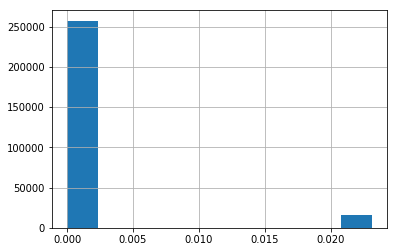

In [43]:
#visualise distribution of values
df['ingredients_from_palm_oil_n'].hist()
plt.show()

In [44]:
#column 'energy_100g', check mean and std deviation
df['energy_100g'].mean()

1123.3514650962575

In [45]:
df['energy_100g'].std()

820.797699896167

In [46]:
#outliers for column 'energy'
filter_energy = np.abs(df['energy_100g']-df['energy_100g'].mean()) > (3*df['energy_100g'].std())
outliers_energy = df.loc[filter_energy, 'energy_100g']
outliers_energy.shape

(1728,)

In [47]:
#replace ouliers with a mean
df['energy_100g']=df['energy_100g'].replace(outliers_energy.values, df['energy_100g'].mean())
df.energy_100g.isnull().sum()

0

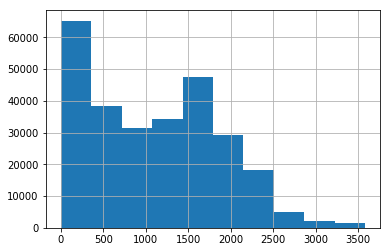

In [48]:
#visualise distribution of values
df['energy_100g'].hist()
plt.show()

In [49]:
#column 'fat_100g', check std deviation and mean
df['fat_100g'].std()

17.38943045815335

In [50]:
df['fat_100g'].mean()

12.716501137876062

In [51]:
#outliers for column 'fat_100g'
filter_fat = np.abs(df['fat_100g']-df['fat_100g'].mean()) > (3*df['fat_100g'].std())
outliers_fat = df.loc[filter_fat, 'fat_100g']
outliers_fat.shape

(5864,)

In [52]:
# replace outliers for column 'fat_100g' with a mean
df['fat_100g'] = df['fat_100g'].replace(outliers_fat.values, df['fat_100g'].mean())
df['fat_100g'].isnull().sum()

0

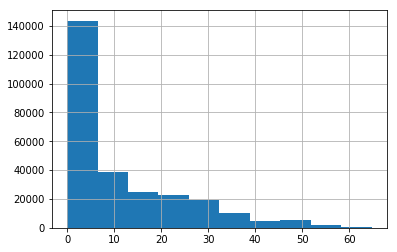

In [53]:
#visualize distribution of values for column 'fat_100g'
df['fat_100g'].hist()
plt.show()

In [54]:
#column 'carbohydrates_100g', check mean and std deviation  
df['carbohydrates_100g'].mean()

31.52354461890448

In [55]:
df['carbohydrates_100g'].std()

28.97284710571187

In [56]:
#outliers for column 'carbohydrates_100g'
filter_carb = np.abs(df['carbohydrates_100g'] - df['carbohydrates_100g'].mean()) > (3*df['carbohydrates_100g'].std())
outliers_carb = df.loc[filter_carb, 'carbohydrates_100g']
outliers_carb.shape

(6,)

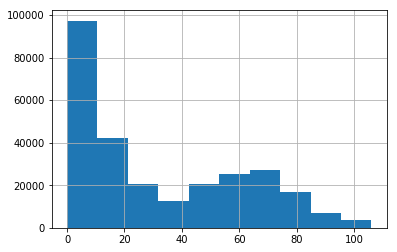

In [57]:
# replace outliers for column 'carbohydrates_100g' with a mean
df['carbohydrates_100g'] = df['carbohydrates_100g'].replace(outliers_carb.values, df['carbohydrates_100g'].mean())
df['carbohydrates_100g'].hist()
plt.show()

In [58]:
#column 'sugars_100g', check mean and std deviation  
df['sugars_100g'].mean()

15.669012073943618

In [59]:
df['sugars_100g'].std()

20.34965326501487

In [60]:
#outliers for column 'sugars_100g'
filter_sugars=np.abs(df['sugars_100g']-df['sugars_100g'].mean()) > (3*df['sugars_100g'].std())
outliers_sugars = df.loc[filter_sugars, 'sugars_100g']
outliers_sugars.shape

(5318,)

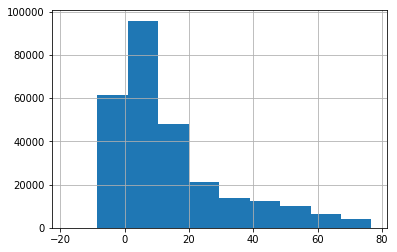

In [61]:
# replace outliers for column 'sugars_100g' with a mean
df['sugars_100g'] = df['sugars_100g'].replace(outliers_sugars.values, df['sugars_100g'].mean())
df['sugars_100g'].hist()
plt.show()

In [62]:
#column 'proteins_100g' check mean and std deviation
df['proteins_100g'].mean()

7.105557720587346

In [63]:
df['proteins_100g'].std()

8.432509028378984

In [64]:
#outliers for column 'proteins_100g'
filter_prot=np.abs(df['proteins_100g']-df['proteins_100g'].mean()) > (3*df['proteins_100g'].std())
outliers_prot = df.loc[filter_prot, 'proteins_100g']
outliers_prot.shape

(3159,)

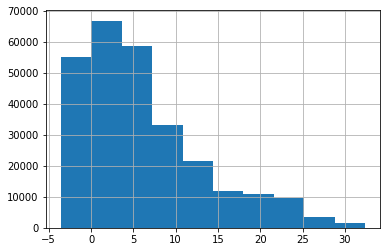

In [65]:
# replace outliers for column 'proteins_100g' with a mean and visualise values distribution
df['proteins_100g'] = df['proteins_100g'].replace(outliers_prot.values, df['proteins_100g'].mean())
df['proteins_100g'].hist()
plt.show()

In [66]:
#column 'salt_100g', check std deviation and a mean
df['salt_100g'].std()

124.16919721080501

In [67]:
df['salt_100g'].mean()

1.9772167147222837

In [68]:
#outliers for column 'salt_100g'
filter_salt = np.abs(df['salt_100g']-df['salt_100g'].mean()) > (3*df['salt_100g'].std())
outliers_salt = df.loc[filter_salt, 'salt_100g']
outliers_salt.shape

(31,)

In [69]:
# replace outliers for column 'salt_100g' with a mean
df['salt_100g']=df['salt_100g'].replace(outliers_salt.values, df['salt_100g'].mean())
df.salt_100g.isnull().sum()

0

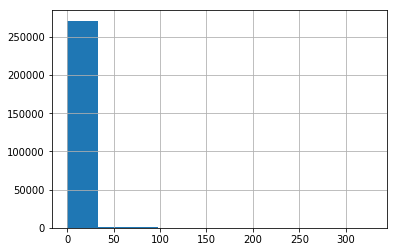

In [70]:
#visualise values distribution
df['salt_100g'].hist()
plt.show()

In [71]:
#column 'sodium_100g', check  mean and std deviation 
df['sodium_100g'].mean()

0.7784939473409153

In [72]:
df['sodium_100g'].std()

48.88550929278066

In [73]:
#outliers for column 'sodium_100g'
filter_sodium = np.abs(df['sodium_100g']-df['sodium_100g'].mean()) > (3*df['sodium_100g'].std())
outliers_sodium = df.loc[filter_sodium, 'sodium_100g']
outliers_sodium.shape

(31,)

In [74]:
# replace outliers for column 'sodium_100g' with a mean
df['sodium_100g']=df['sodium_100g'].replace(outliers_sodium.values, df['sodium_100g'].mean())
df.sodium_100g.isnull().sum()

0

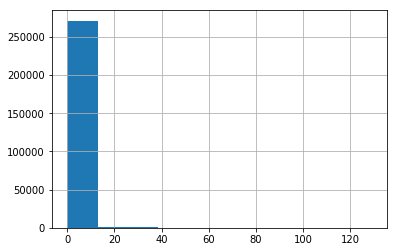

In [75]:
#visualise values distribution
df['sodium_100g'].hist()
plt.show()

In [76]:
#check once again null values
df.isnull().sum()
# no null values

created_datetime               0
last_modified_datetime         0
product_name                   0
brands                         0
countries_en                   0
ingredients_text               0
ingredients_from_palm_oil_n    0
energy_100g                    0
fat_100g                       0
saturated-fat_100g             0
carbohydrates_100g             0
sugars_100g                    0
proteins_100g                  0
salt_100g                      0
sodium_100g                    0
nutrition-score-fr_100g        0
nutrition-score-uk_100g        0
dtype: int64

In [77]:
#check data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272965 entries, 0 to 272964
Data columns (total 17 columns):
created_datetime               272965 non-null object
last_modified_datetime         272965 non-null object
product_name                   272965 non-null object
brands                         272965 non-null object
countries_en                   272965 non-null object
ingredients_text               272965 non-null object
ingredients_from_palm_oil_n    272965 non-null float64
energy_100g                    272965 non-null float64
fat_100g                       272965 non-null float64
saturated-fat_100g             272965 non-null float64
carbohydrates_100g             272965 non-null float64
sugars_100g                    272965 non-null float64
proteins_100g                  272965 non-null float64
salt_100g                      272965 non-null float64
sodium_100g                    272965 non-null float64
nutrition-score-fr_100g        272965 non-null float64
nutrition-score

In [78]:
#clean column 'countries_en'
df_countries=df['countries_en']
df_countries.head()

0    United States
1    United States
2    United States
3    United States
4    United States
Name: countries_en, dtype: object

In [79]:
df_countries=df_countries.str.split(',', expand=True)
df_countries.head()
#we can see that there are a lot of countries in some cells (up to 21). 

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,United States,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,United States,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,United States,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,United States,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,United States,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [80]:
#let's keep the first one value
df['countries_en']=df_countries[0]
df['countries_en'].head()

0    United States
1    United States
2    United States
3    United States
4    United States
Name: countries_en, dtype: object

In [81]:
#Now data set is cleaned and ready for further analysis

## B. Manipulating the data
### Choose 3 interesting questions to answer about the data

### Question 1.
##### From what country  are the most of the products ?  What are top 20 countries with the most of products? From how many countries are the products in the data set? 

In [82]:
grouped = df.groupby('countries_en')

In [83]:
grouped = grouped.size().sort_values(ascending=False).nlargest(20)
grouped

#we see top 20 countries by number of products

# the biggest number of products is from USA, much more than from others countries
# about 60% of product are from USA, about 30% from France.

countries_en
United States     169377
France             78944
Switzerland         8282
Germany             5094
Spain               3098
United Kingdom      1617
Belgium             1595
Russia               709
Australia            585
Italy                442
Portugal             399
Canada               269
Sweden               260
Netherlands          254
Serbia               252
Denmark              192
Austria              156
Hungary              134
Mexico                92
Brazil                81
dtype: int64

In [84]:
#count number of countries in data set
df['countries_en'].value_counts()

#there are foods form 115 countries in data set

United States                       169377
France                               78944
Switzerland                           8282
Germany                               5094
Spain                                 3098
United Kingdom                        1617
Belgium                               1595
Russia                                 709
Australia                              585
Italy                                  442
Portugal                               399
Canada                                 269
Sweden                                 260
Netherlands                            254
Serbia                                 252
Denmark                                192
Austria                                156
Hungary                                134
Mexico                                  92
Brazil                                  81
Romania                                 66
New Zealand                             64
Poland                                  59
country not

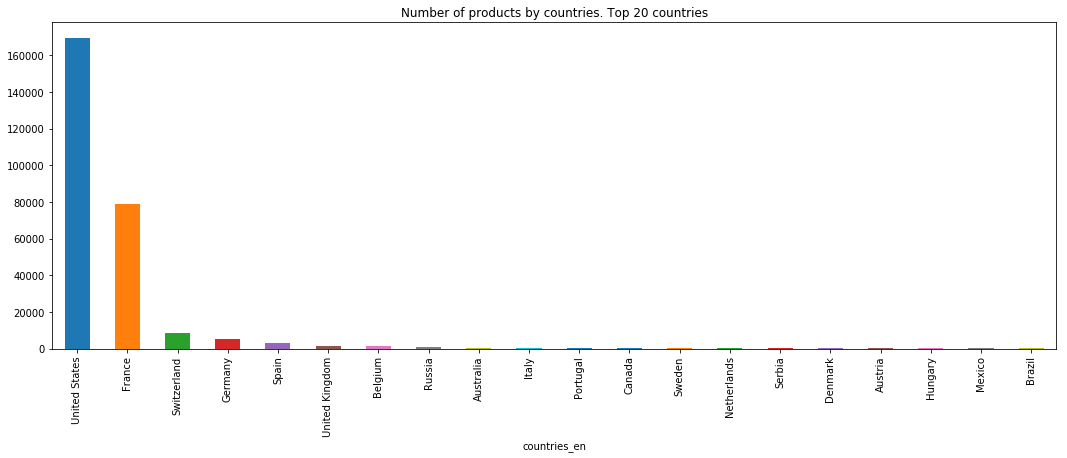

In [85]:
#visualisation of results

grouped.plot.bar(figsize=(18,6), title='Number of products by countries. Top 20 countries')
plt.show()

In [86]:
#Answers
# biggest number of products is from USA, much more than from others countries
# about 60% of product are from USA, about 30% from France

### Question2 
##### How many foods are there with ingredients from palm oil? From which countries are these foods? (Top-10 countries)

In [87]:
#sorting data set by column 'ingredients_from_palm_oil' to get an  idea of values in that column

df.sort_values(by='ingredients_from_palm_oil_n',ascending=False)

,created_datetime,last_modified_datetime,product_name,brands,countries_en,ingredients_text,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
231671,2017-09-10T14:26:32Z,2017-09-10T16:11:30Z,Chinois Nature,Biscuits Délices,France,"Farine de _blé_, Crème pâtissière 35% (Eau, Su...",0.023115,1134.0,5.90,2.700000,48.50,23.300000,5.40,0.65000,0.255906,12.000000,12.00000
218839,2016-02-05T20:06:00Z,2017-03-08T16:14:00Z,Chocolat Lait Xplosion,Carrefour,France,"Chocolat au lait 48% (sucre, beurre de cacao, ...",0.023115,2102.0,22.00,13.000000,69.00,46.000000,5.70,0.40000,0.157480,24.000000,24.00000
181185,2017-07-10T15:02:18Z,2017-07-10T15:02:22Z,Balla Pik,Haribo,France,sucre; sirop de glucose; amidon de maîs; hUmec...,0.023115,1552.0,2.70,1.800000,87.00,63.000000,1.10,0.34000,0.133858,16.000000,16.00000
218858,2017-09-14T08:02:10Z,2017-09-14T08:02:19Z,Biscuits assortiment aux 3 chocolats,Carrefour,France,"Farine de blé, chocolat au lait 21,8% [sucre, ...",0.023115,2201.0,28.00,17.000000,62.00,41.000000,5.80,0.30000,0.118110,23.000000,23.00000
181176,2013-04-10T11:14:51Z,2015-03-04T16:46:06Z,Haribo World Mix,Haribo,France,Sirop de glucose-fructose - Sucre - farine de ...,0.023115,1490.0,1.10,0.800000,80.00,54.000000,4.00,1.97516,0.777684,9.164287,8.98242
247566,2016-05-14T19:42:01Z,2016-05-16T07:49:57Z,Wafers Cacau,Vieira,France,"Graisses végétales hydrogénées (coco, palme), ...",0.023115,2408.0,38.30,36.700000,54.00,35.800000,3.80,0.80000,0.314961,27.000000,27.00000
247565,2017-07-13T20:57:39Z,2017-07-13T20:57:44Z,Gaufrette saveur vanille et flocons de framboises,Vieira,France,"Graisses végétales hydrogénées (coco, palme) d...",0.023115,2255.0,31.00,29.600000,62.00,42.700000,2.80,0.70000,0.275591,28.000000,28.00000
247564,2017-09-05T08:06:25Z,2017-09-05T08:06:29Z,BARQUILLOS WAFERS CHOCOLATE VIEIRA,Waffers,France,GAUFRETTE CHOCOLAT Fourragc 72%: Crème (68%) +...,0.023115,2213.0,29.50,26.500000,60.00,39.400000,4.90,0.30000,0.118110,25.000000,25.00000
181158,2014-09-10T13:01:10Z,2017-03-05T16:24:04Z,Music Mix,Haribo,France,"Sirop de glucose, sucre, sirop de sucre mélass...",0.023115,1431.0,0.80,0.400000,77.00,46.000000,4.20,0.53000,0.208661,16.000000,16.00000
266089,2017-05-24T18:41:16Z,2017-05-24T18:41:19Z,Bubom almendra,Mandul,France,EAU AMANDE CHOCOLAT. Ingrédients.' Farine de B...,0.023115,2000.0,30.90,6.500000,44.00,23.100000,6.00,0.70000,0.275591,19.000000,19.00000


In [88]:
#filter data set, keep rows with values in 'ingredients_from_palm_oil_n' column whish are more than 0
#group by countries

filter = df['ingredients_from_palm_oil_n'] != 0
palm_oil = df[filter].groupby('countries_en').size().sort_values(ascending=False).nlargest(10)
palm_oil

countries_en
France            9549
Switzerland       3437
Belgium            449
Germany            378
Russia             352
United States      254
United Kingdom     137
Hungary             96
Spain               92
Australia           82
dtype: int64

In [89]:
#count how many products in data set have ingredients from palm oil

df[filter].count()

#there are 15 491 products

created_datetime               15491
last_modified_datetime         15491
product_name                   15491
brands                         15491
countries_en                   15491
ingredients_text               15491
ingredients_from_palm_oil_n    15491
energy_100g                    15491
fat_100g                       15491
saturated-fat_100g             15491
carbohydrates_100g             15491
sugars_100g                    15491
proteins_100g                  15491
salt_100g                      15491
sodium_100g                    15491
nutrition-score-fr_100g        15491
nutrition-score-uk_100g        15491
dtype: int64

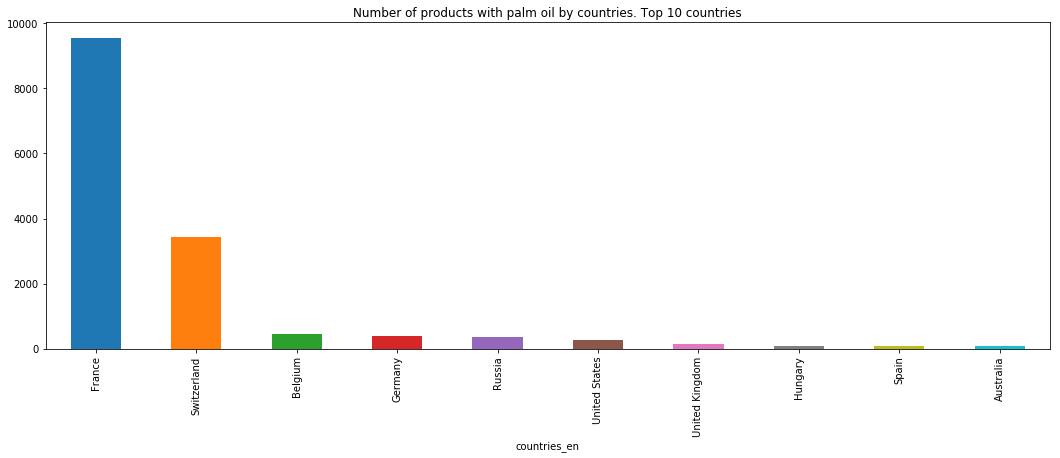

In [90]:
#visualise the result
palm_oil.plot.bar(figsize=(18,6), title='Number of products with palm oil by countries. Top 10 countries')
plt.show()

In [91]:
#Answers
#there are 15 491 products with palm oil which is not so many (about 5% of total number of foods in data set)
#Most of foods with palm oil come from France and Switzerland

### Question 3
##### What is nutrition breakdown by countries? Foods from what countries are the most caloric and contain most sugar and salt? 


In [92]:
#function to transfer energy to calories, place data in new column

def kkal(x):
    return x/4.18
df['calories_100g'] = df.energy_100g.apply(kkal)

In [93]:
#function to count how many calories we are from proteins (in 1g of proteins there are 4 calories)

def kkal_prot(x):
    return x*4
df['calories_from_proteins_100g'] = df.proteins_100g.apply(kkal_prot)

In [94]:
#function to count how many calories we are from carbohydrates (in 1g of carbohydrates there are 4 calories)

def kkal_carb(x):
    return x*4
df['calories_from_carbohydrates_100g'] = df.carbohydrates_100g.apply(kkal_prot)

In [95]:
#function to count how many calories we are from fat (in 1g of fats there are 9 calories)

def kkal_fat(x):
    return x*9
df['calories_from_fat_100g'] = df.fat_100g.apply(kkal_prot)

In [96]:
df.head()

,created_datetime,last_modified_datetime,product_name,brands,countries_en,ingredients_text,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,...,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,calories_100g,calories_from_proteins_100g,calories_from_carbohydrates_100g,calories_from_fat_100g
0,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),Brand not availble,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,2243.0,28.57,28.570000,...,14.290000,3.57,0.00000,0.000000,14.000000,14.00000,536.602871,14.28,257.16,114.28
1,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,1941.0,17.86,0.000000,...,17.860000,17.86,0.63500,0.250000,0.000000,0.00000,464.354067,71.44,242.84,71.44
2,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,United States,"Organic hazelnuts, organic cashews, organic wa...",0.0,2540.0,57.14,5.360000,...,3.570000,17.86,1.22428,0.482000,12.000000,12.00000,607.655502,71.44,71.44,228.56
3,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,United States,Organic polenta,0.0,1552.0,1.43,5.032397,...,15.672419,8.57,1.97516,0.777684,9.164287,8.98242,371.291866,34.28,308.56,5.72
4,2017-03-09T10:34:11Z,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,Unfi,United States,"Rolled oats, grape concentrate, expeller press...",0.0,1933.0,18.27,1.920000,...,11.540000,13.46,1.97516,0.777684,9.164287,8.98242,462.440191,53.84,253.84,73.08


In [97]:
#commands to get info by countries

countries = df.groupby('countries_en').agg({'product_name' : 'count', 'calories_100g':'mean', 'calories_from_fat_100g':'mean', 'calories_from_carbohydrates_100g':'mean', 'calories_from_proteins_100g':'mean', 'salt_100g':'mean', 'sugars_100g':'mean'}).sort_values(by='product_name', ascending=False)
countries = countries.iloc[0:5, :].sort_values(by='calories_100g', ascending=False)
countries

#keep top 5 countries with the largest number of foods

,product_name,calories_100g,calories_from_fat_100g,calories_from_carbohydrates_100g,calories_from_proteins_100g,salt_100g,sugars_100g
countries_en,,,,,,,
Germany,5094,280.246322,53.625606,105.465151,30.675580,1.070019,13.207620
United States,169377,266.667341,43.369960,134.928632,25.426365,1.879266,15.373627
Switzerland,8282,261.140431,45.533822,117.741583,26.421390,1.156130,13.990248
France,78944,260.149837,46.128267,110.479225,29.502983,1.152639,12.071578
Spain,3098,239.215575,43.465224,106.921511,22.776746,1.173090,12.186876


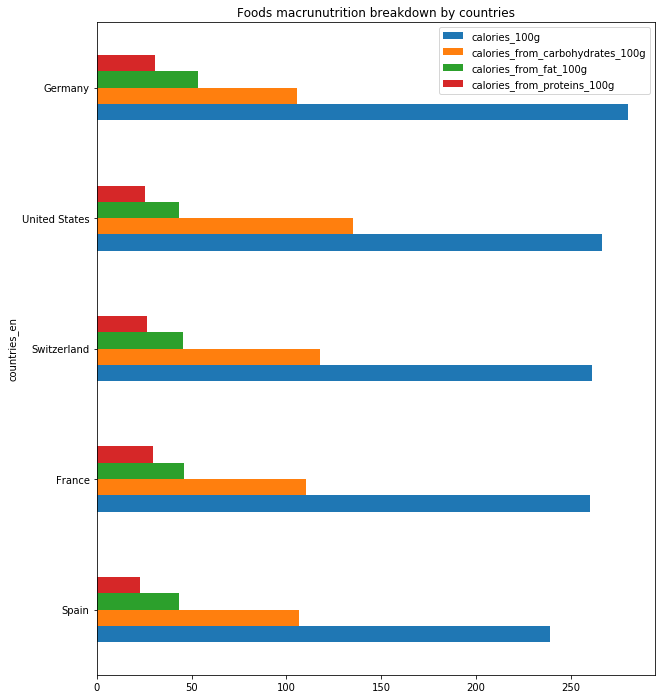

In [98]:
countries[['calories_100g', 'calories_from_carbohydrates_100g', 'calories_from_fat_100g', 'calories_from_proteins_100g']].sort_values(by='calories_100g').plot.barh(figsize=(10,12), title='Foods macrunutrition breakdown by countries')
plt.legend(loc="upper right")
plt.show()

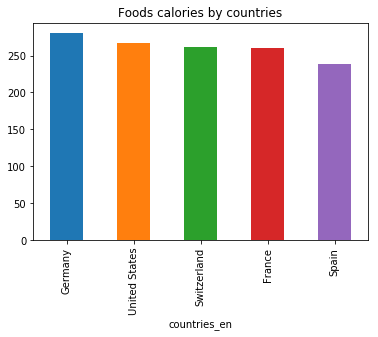

In [99]:
#visualiation for only calories values by countries
countries['calories_100g'].plot.bar(title='Foods calories by countries')
plt.show()

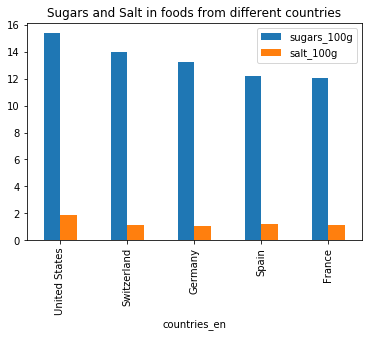

In [100]:
#visualiation for sugar and salt values by countries

countries[['sugars_100g', 'salt_100g']].sort_values(by='sugars_100g', ascending=False).plot.bar(title='Sugars and Salt in foods from different countries')
plt.show()

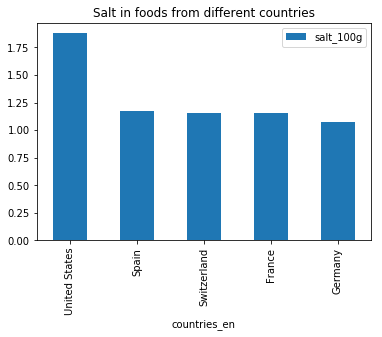

In [101]:
#visualiation for just salt values by countries

countries[['salt_100g']].sort_values(by='salt_100g', ascending=False).plot.bar(title='Salt in foods from different countries')
plt.show()

In [102]:
#We can see that foods from USA contain most sugar and salt than foods from any other country
#the most caloric foods are from Germany

### Question 4. (additional question ) 
##### For each product find a maximum value in each column

In [103]:
#check data set
df.head()

,created_datetime,last_modified_datetime,product_name,brands,countries_en,ingredients_text,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,...,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,calories_100g,calories_from_proteins_100g,calories_from_carbohydrates_100g,calories_from_fat_100g
0,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),Brand not availble,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,2243.0,28.57,28.570000,...,14.290000,3.57,0.00000,0.000000,14.000000,14.00000,536.602871,14.28,257.16,114.28
1,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,1941.0,17.86,0.000000,...,17.860000,17.86,0.63500,0.250000,0.000000,0.00000,464.354067,71.44,242.84,71.44
2,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,United States,"Organic hazelnuts, organic cashews, organic wa...",0.0,2540.0,57.14,5.360000,...,3.570000,17.86,1.22428,0.482000,12.000000,12.00000,607.655502,71.44,71.44,228.56
3,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,United States,Organic polenta,0.0,1552.0,1.43,5.032397,...,15.672419,8.57,1.97516,0.777684,9.164287,8.98242,371.291866,34.28,308.56,5.72
4,2017-03-09T10:34:11Z,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,Unfi,United States,"Rolled oats, grape concentrate, expeller press...",0.0,1933.0,18.27,1.920000,...,11.540000,13.46,1.97516,0.777684,9.164287,8.98242,462.440191,53.84,253.84,73.08


In [104]:
#change index, set 'product_name' as index
df.set_index('product_name', inplace=True)

In [105]:
#check the result
df_new=df
df_new.head()

,created_datetime,last_modified_datetime,brands,countries_en,ingredients_text,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,calories_100g,calories_from_proteins_100g,calories_from_carbohydrates_100g,calories_from_fat_100g
product_name,,,,,,,,,,,,,,,,,,,,
Banana Chips Sweetened (Whole),2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Brand not availble,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,2243.0,28.57,28.570000,64.29,14.290000,3.57,0.00000,0.000000,14.000000,14.00000,536.602871,14.28,257.16,114.28
Peanuts,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Torn & Glasser,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,1941.0,17.86,0.000000,60.71,17.860000,17.86,0.63500,0.250000,0.000000,0.00000,464.354067,71.44,242.84,71.44
Organic Salted Nut Mix,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,Grizzlies,United States,"Organic hazelnuts, organic cashews, organic wa...",0.0,2540.0,57.14,5.360000,17.86,3.570000,17.86,1.22428,0.482000,12.000000,12.00000,607.655502,71.44,71.44,228.56
Organic Polenta,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,Bob's Red Mill,United States,Organic polenta,0.0,1552.0,1.43,5.032397,77.14,15.672419,8.57,1.97516,0.777684,9.164287,8.98242,371.291866,34.28,308.56,5.72
Breadshop Honey Gone Nuts Granola,2017-03-09T10:34:11Z,2017-03-09T10:34:11Z,Unfi,United States,"Rolled oats, grape concentrate, expeller press...",0.0,1933.0,18.27,1.920000,63.46,11.540000,13.46,1.97516,0.777684,9.164287,8.98242,462.440191,53.84,253.84,73.08


In [106]:
#command to get only columns with numeric data

df_num=df_new._get_numeric_data()

In [107]:
#check the result

df_num.head()

,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,calories_100g,calories_from_proteins_100g,calories_from_carbohydrates_100g,calories_from_fat_100g
product_name,,,,,,,,,,,,,,,
Banana Chips Sweetened (Whole),0.0,2243.0,28.57,28.570000,64.29,14.290000,3.57,0.00000,0.000000,14.000000,14.00000,536.602871,14.28,257.16,114.28
Peanuts,0.0,1941.0,17.86,0.000000,60.71,17.860000,17.86,0.63500,0.250000,0.000000,0.00000,464.354067,71.44,242.84,71.44
Organic Salted Nut Mix,0.0,2540.0,57.14,5.360000,17.86,3.570000,17.86,1.22428,0.482000,12.000000,12.00000,607.655502,71.44,71.44,228.56
Organic Polenta,0.0,1552.0,1.43,5.032397,77.14,15.672419,8.57,1.97516,0.777684,9.164287,8.98242,371.291866,34.28,308.56,5.72
Breadshop Honey Gone Nuts Granola,0.0,1933.0,18.27,1.920000,63.46,11.540000,13.46,1.97516,0.777684,9.164287,8.98242,462.440191,53.84,253.84,73.08


In [108]:
#command to get a product with a maximum value for each column

df_num.apply(np.argmax)

C:\Users\User1\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


ingredients_from_palm_oil_n         4 Indulgent & Chewy Maple Syrup & Pecan Giant ...
energy_100g                                                Tapas Moules Ail et Persil
fat_100g                                                                      Walnuts
saturated-fat_100g                                                Ez Thun Dipping Aid
carbohydrates_100g                                                  Palets Pur Beurre
sugars_100g                                                                   Nesquik
proteins_100g                                                                Parmesan
salt_100g                                                     Autumn Cookie Selection
sodium_100g                                                   Autumn Cookie Selection
nutrition-score-fr_100g                               Maxwell House, Creme Cappuccino
nutrition-score-uk_100g                               Maxwell House, Creme Cappuccino
calories_100g                                         

In [109]:
#As some insights, can mention
#1 parmesan as the top proteins food
#2 Walnuts has most fats
#3 Autumn Cookie Selection contains most of salt and sodium
#4 Most caloric food is Tapas Moules Ail et Persil


## C. Text data.
### Find the five most common ingredients based on 'ingredients_text' column

In [110]:
#first, command to reset index
df.reset_index(inplace=True)

In [111]:
# check the result
df.head()

,product_name,created_datetime,last_modified_datetime,brands,countries_en,ingredients_text,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,...,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,calories_100g,calories_from_proteins_100g,calories_from_carbohydrates_100g,calories_from_fat_100g
0,Banana Chips Sweetened (Whole),2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Brand not availble,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,2243.0,28.57,28.570000,...,14.290000,3.57,0.00000,0.000000,14.000000,14.00000,536.602871,14.28,257.16,114.28
1,Peanuts,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Torn & Glasser,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,1941.0,17.86,0.000000,...,17.860000,17.86,0.63500,0.250000,0.000000,0.00000,464.354067,71.44,242.84,71.44
2,Organic Salted Nut Mix,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,Grizzlies,United States,"Organic hazelnuts, organic cashews, organic wa...",0.0,2540.0,57.14,5.360000,...,3.570000,17.86,1.22428,0.482000,12.000000,12.00000,607.655502,71.44,71.44,228.56
3,Organic Polenta,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,Bob's Red Mill,United States,Organic polenta,0.0,1552.0,1.43,5.032397,...,15.672419,8.57,1.97516,0.777684,9.164287,8.98242,371.291866,34.28,308.56,5.72
4,Breadshop Honey Gone Nuts Granola,2017-03-09T10:34:11Z,2017-03-09T10:34:11Z,Unfi,United States,"Rolled oats, grape concentrate, expeller press...",0.0,1933.0,18.27,1.920000,...,11.540000,13.46,1.97516,0.777684,9.164287,8.98242,462.440191,53.84,253.84,73.08


In [112]:
#now have a look at the column 'Ingredients'

df['ingredients_text'].head()

0    Bananas, vegetable oil (coconut oil, corn oil ...
1    Peanuts, wheat flour, sugar, rice flour, tapio...
2    Organic hazelnuts, organic cashews, organic wa...
3                                      Organic polenta
4    Rolled oats, grape concentrate, expeller press...
Name: ingredients_text, dtype: object

In [113]:
#commands to put all words in column into lower case

ingr = df['ingredients_text'].str.lower()
ingr.head()

0    bananas, vegetable oil (coconut oil, corn oil ...
1    peanuts, wheat flour, sugar, rice flour, tapio...
2    organic hazelnuts, organic cashews, organic wa...
3                                      organic polenta
4    rolled oats, grape concentrate, expeller press...
Name: ingredients_text, dtype: object

In [114]:
df['ingredients_text'] = ingr
df['ingredients_text'].head()

0    bananas, vegetable oil (coconut oil, corn oil ...
1    peanuts, wheat flour, sugar, rice flour, tapio...
2    organic hazelnuts, organic cashews, organic wa...
3                                      organic polenta
4    rolled oats, grape concentrate, expeller press...
Name: ingredients_text, dtype: object

In [115]:
#split the strings with ingredients in each row by comma

ingredients=df['ingredients_text'].str.split(', ', expand = True)
ingredients.head()

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,bananas,vegetable oil (coconut oil,corn oil and/or palm oil) sugar,natural banana flavor.,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,peanuts,wheat flour,sugar,rice flour,tapioca starch,salt,leavening (ammonium bicarbonate,baking soda),soy sauce (water,soybeans,...,None,None,None,None,None,None,None,None,None,None
2,organic hazelnuts,organic cashews,organic walnuts almonds,organic sunflower oil,sea salt.,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,organic polenta,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,rolled oats,grape concentrate,expeller pressed canola oil,sunflower seeds,almonds,walnuts oat bran,sesame seeds,cashews,natural vitamin e.,None,...,None,None,None,None,None,None,None,None,None,None


In [116]:
#check info about new dataframe
ingredients.describe()

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
count,272965,235086,222394,206791,190933,176208,162370,150025,137977,125799,...,1,1,1,1,1,1,1,1,1,1
unique,83286,53140,50660,48085,45099,42129,39785,37453,35265,32903,...,1,1,1,1,1,1,1,1,1,1
top,sugar,water,salt,salt,salt,salt,salt,salt,salt,salt,...,dextrose,modified food starch,sugar,dehydrated onion,yeast extract,corn oil,natural and artificial flavors,citric acid),salt,modified food starch.
freq,11038,17617,10040,7369,6500,5975,5387,4786,4464,4143,...,1,1,1,1,1,1,1,1,1,1


In [117]:
#have a look at values from first column to get the idea of data
ingredients[0].value_counts()

sugar                                                                                                                                             11038
water                                                                                                                                              9865
not available                                                                                                                                      9472
eau                                                                                                                                                3936
sucre                                                                                                                                              3618
carbonated water                                                                                                                                   3330
filtered water                                                                          

In [118]:
#there are 'water' and 'eau' which are the same. Identically for salt and sel. Let's replace it

ingredients = ingredients.replace({'sel':'salt',  'eau': 'water', 'sucre':'sugar'})
ingredients[0].value_counts()

sugar                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  14656
water                                                                                                                                                                                                                                                                                                                                                                                      

In [119]:
#check again  info about dataframe

ingredients.describe()

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
count,272965,235086,222394,206791,190933,176208,162370,150025,137977,125799,...,1,1,1,1,1,1,1,1,1,1
unique,83283,53137,50657,48082,45096,42126,39782,37450,35262,32900,...,1,1,1,1,1,1,1,1,1,1
top,sugar,water,salt,salt,salt,salt,salt,salt,salt,salt,...,dextrose,modified food starch,sugar,dehydrated onion,yeast extract,corn oil,natural and artificial flavors,citric acid),salt,modified food starch.
freq,14656,25740,13044,9847,9047,8285,7667,6977,6300,5626,...,1,1,1,1,1,1,1,1,1,1


In [120]:
#commands to count values

ingredients.apply(pd.Series.value_counts)

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
,25.0,18.0,20.0,17.0,12.0,16.0,12.0,17.0,17.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,6.0,3.0,1.0,1.0,3.0,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,12.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"chocolat au lait* 14,6% (sucre de canne*",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
ingredients1=ingredients.melt().dropna()
ingredients1

,variable,value
0,0,bananas
1,0,peanuts
2,0,organic hazelnuts
3,0,organic polenta
4,0,rolled oats
5,0,org oats
6,0,organic chocolate liquor
7,0,organic adzuki beans
8,0,organic refined durum semolina wheat flour
9,0,roasted peanuts (peanuts


In [122]:
#here we have 5 most common ingredients
ingredients1['value'].value_counts().nlargest(5)

salt           120543
sugar           91523
water           84092
citric acid     24394
niacin          19105
Name: value, dtype: int64

In [123]:
#Answer
#5 most common ingredients are
#salt, sugar, water, citric acid and niacin

### D. Time-series analysis

##### Investigate more closely the created_datetime and last_modified_datetime. First, analyze the mean time difference between these two values. And second, analyze the mean number of created items per month over the timeline of the data. For the second question, you will also choose an appropriate method to visualize your findings.

In [124]:
#create dataframe with 2 time columns

dftime =df[['created_datetime', 'last_modified_datetime']]
dftime.head()

,created_datetime,last_modified_datetime
0,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z
1,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z
2,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z
3,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z
4,2017-03-09T10:34:11Z,2017-03-09T10:34:11Z


In [125]:
#clean the data in these columns

dftime['created_datetime'] = dftime['created_datetime'].str.replace('T',' ')
dftime['created_datetime'] = dftime['created_datetime'].str.replace('Z','')

dftime['last_modified_datetime'] = dftime['last_modified_datetime'].str.replace('T',' ')
dftime['last_modified_datetime'] = dftime['last_modified_datetime'].str.replace('Z','')
dftime.head()

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\User1\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,created_datetime,last_modified_datetime
0,2017-03-09 14:32:37,2017-03-09 14:32:37
1,2017-03-09 14:32:37,2017-03-09 14:32:37
2,2017-03-09 10:35:31,2017-03-09 10:35:31
3,2017-03-09 10:34:13,2017-03-09 10:34:13
4,2017-03-09 10:34:11,2017-03-09 10:34:11


In [126]:
#pass to datetime format

dftime['last_modified_datetime']=pd.to_datetime(dftime['last_modified_datetime'])
dftime['created_datetime']=pd.to_datetime(dftime['created_datetime'])

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [127]:
#check the result

dftime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272965 entries, 0 to 272964
Data columns (total 2 columns):
created_datetime          272965 non-null datetime64[ns]
last_modified_datetime    272965 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 4.2 MB


In [128]:
dftime.head()

,created_datetime,last_modified_datetime
0,2017-03-09 14:32:37,2017-03-09 14:32:37
1,2017-03-09 14:32:37,2017-03-09 14:32:37
2,2017-03-09 10:35:31,2017-03-09 10:35:31
3,2017-03-09 10:34:13,2017-03-09 10:34:13
4,2017-03-09 10:34:11,2017-03-09 10:34:11


In [129]:
#calculate difference between two dates

dftime['Difference']=dftime['last_modified_datetime']-dftime['created_datetime']

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [130]:
dftime.head()

,created_datetime,last_modified_datetime,Difference
0,2017-03-09 14:32:37,2017-03-09 14:32:37,0 days
1,2017-03-09 14:32:37,2017-03-09 14:32:37,0 days
2,2017-03-09 10:35:31,2017-03-09 10:35:31,0 days
3,2017-03-09 10:34:13,2017-03-09 10:34:13,0 days
4,2017-03-09 10:34:11,2017-03-09 10:34:11,0 days


In [131]:
#find the mean

dftime['Difference'].mean()

Timedelta('102 days 19:00:30.357349')

In [132]:
#Answer: mean time difference is 102 days

In [133]:
#Now second part of the task: analyze the mean number of created items per month over the timeline of the data

#change the index
dftime.set_index('created_datetime', inplace = True)
dftime.head()

,last_modified_datetime,Difference
created_datetime,,
2017-03-09 14:32:37,2017-03-09 14:32:37,0 days
2017-03-09 14:32:37,2017-03-09 14:32:37,0 days
2017-03-09 10:35:31,2017-03-09 10:35:31,0 days
2017-03-09 10:34:13,2017-03-09 10:34:13,0 days
2017-03-09 10:34:11,2017-03-09 10:34:11,0 days


In [134]:
#resamle data to monthly frequency and count number of entries per month

dftime_monthly=dftime.resample('M')['last_modified_datetime'].count()
dftime_monthly

created_datetime
2012-01-31         1
2012-02-29        10
2012-03-31       115
2012-04-30       135
2012-05-31       345
2012-06-30       731
2012-07-31       372
2012-08-31       128
2012-09-30       328
2012-10-31       409
2012-11-30       499
2012-12-31       248
2013-01-31       320
2013-02-28       489
2013-03-31       411
2013-04-30      1057
2013-05-31       530
2013-06-30       487
2013-07-31       541
2013-08-31       737
2013-09-30       848
2013-10-31       767
2013-11-30       455
2013-12-31       557
2014-01-31       466
2014-02-28       588
2014-03-31       616
2014-04-30       909
2014-05-31       743
2014-06-30       686
               ...  
2015-04-30      2276
2015-05-31      1644
2015-06-30      1596
2015-07-31      1770
2015-08-31      1670
2015-09-30      1349
2015-10-31      1215
2015-11-30      1342
2015-12-31      1815
2016-01-31      1796
2016-02-29      1316
2016-03-31      1774
2016-04-30      3054
2016-05-31      2803
2016-06-30      1277
2016-07-31      1

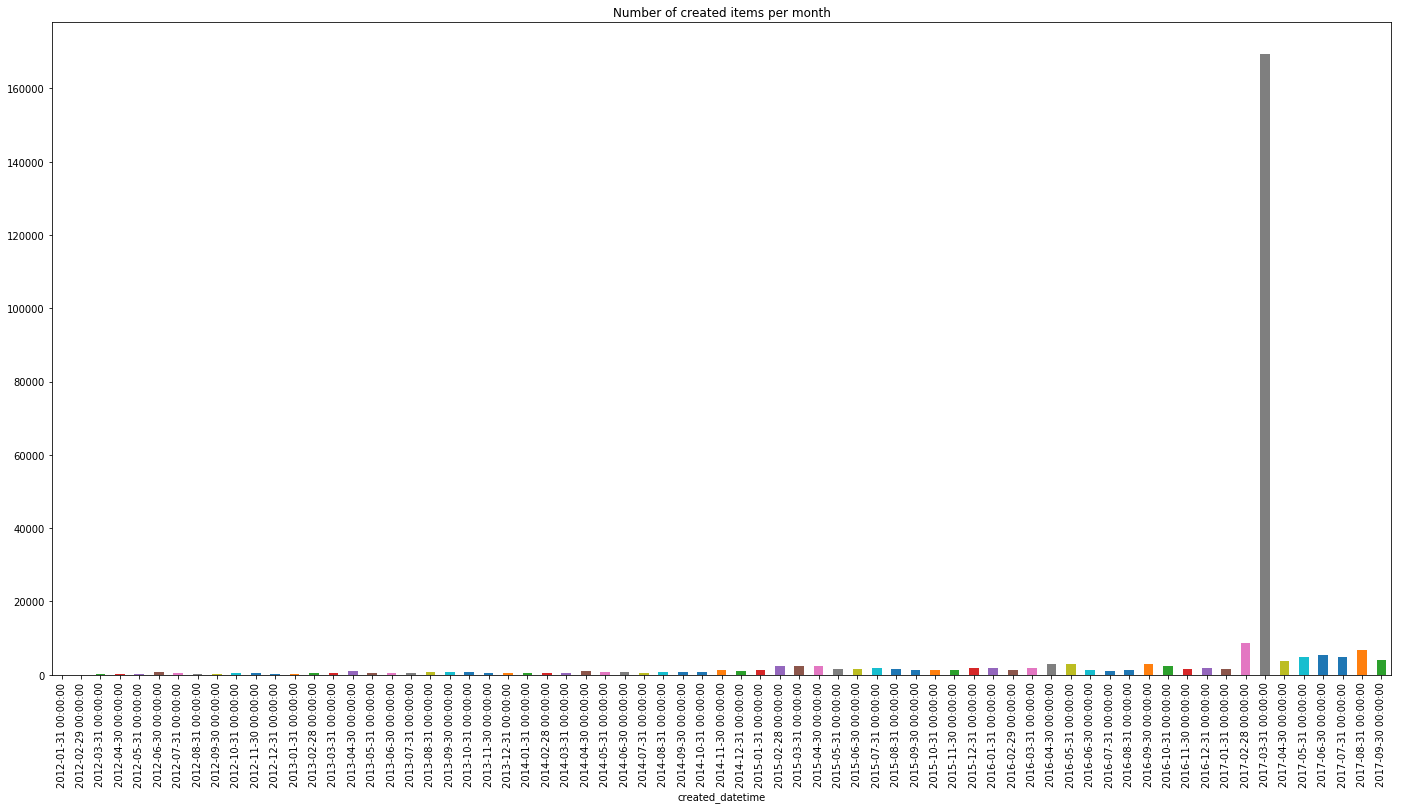

In [135]:
#visualise the data

#we see that biggest number of entries were in March 2017
dftime_monthly.plot.bar(figsize=(24,12), title='Number of created items per month')
plt.show()

In [136]:
#here is the mean number of created items per month 

dftime_monthly.mean()

3956.014492753623

In [137]:
#Answers
#1 mean time difference  is 102 days
#2 mean number of created items per month is 3956


## E. Build a database to hold your data

### Define appropriate tables and well as primary keys for connecting them. 
### In particular, you can follow the following list of steps:
   #### - restrict your data to 1000 entries and 5 columns of your choice
   #### - create a connection to a sqlite3 database
   #### - create one or multiple tables, at least one of the tables should have a PRIMARY KEY
   #### - fill the database with your data
   #### - run at least one query to demonstrate that it works correctly

In [138]:
# create a connection to a sqlite3 database

import sqlite3

In [139]:
#create an empty database

db = sqlite3.connect('foods_database.db')

In [140]:
#create table

query = 'CREATE TABLE foods (id INTEGER PRIMARY KEY, product_name TEXT, brands TEXT, countries_en TEXT, energy_100g INTEGER, salt_100g INTEGER);'

In [141]:
cursor = db.cursor()

In [142]:
cursor.execute(query)

OperationalError: table foods already exists

In [143]:
#check that the table was created
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

In [144]:
results = cursor.fetchall()
print(results)

[('foods',)]


In [145]:
#restricting data to 5 columns and 1000 rows
df_for_db = df.loc[1:1000, ['product_name', 'brands', 'countries_en', 'energy_100g', 'salt_100g']]
df_for_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 5 columns):
product_name    1000 non-null object
brands          1000 non-null object
countries_en    1000 non-null object
energy_100g     1000 non-null float64
salt_100g       1000 non-null float64
dtypes: float64(2), object(3)
memory usage: 39.1+ KB


In [146]:
#transfer data to database
df_for_db.to_sql(name='foods', con=db, if_exists='append', index=False)

In [147]:
#query to ti check if it works
cursor.execute('SELECT product_name FROM foods;')
results = cursor.fetchall()
print(results)

[('Peanuts',), ('Organic Salted Nut Mix',), ('Organic Polenta',), ('Breadshop Honey Gone Nuts Granola',), ('Organic Muesli',), ('Organic Dark Chocolate Minis',), ('Organic Adzuki Beans',), ('Organic Penne Pasta',), ('Zen Party Mix',), ('Organic Golden Flax Seeds',), ('Organic Spicy Punks',), ('Cinnamon Nut Granola',), ('Organic Hazelnuts',), ('Organic Sweetened Banana Chips',), ('Lotus Organic Brown Jasmine Rice',), ('Organic Oat Groats',), ('Energy Power Mix',), ('Antioxidant Mix - Berries & Chocolate',), ('Organic Quinoa Coconut Granola With Mango',), ('Fire Roasted Hatch Green Chile Almonds',), ('Peanut Butter Power Chews',), ('Organic Unswt Berry Coconut Granola',), ('Roasted Salted Black Pepper Cashews',), ('Thai Curry Roasted Cashews',), ('Wasabi Tamari Almonds',), ('Organic Medium Shredded Coconut',), ('Organic Red Quinoa',), ('Dark Chocolate Coconut Chews',), ('Seventh Heaven Organic Trail Mix',), ('Organic Unsweetened Granola, Cinnamon Almond',), ('Organic Blueberry Almond Gra

## F. Finding correlation score
#### Find correlations between the different data fields.  Identify the variables which most affect the nutritional score and provide some insight into which factors cause both a low or a high nutritional score.

In [148]:
#have a look at columns 
df.columns

Index(['product_name', 'created_datetime', 'last_modified_datetime', 'brands',
       'countries_en', 'ingredients_text', 'ingredients_from_palm_oil_n',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'calories_100g',
       'calories_from_proteins_100g', 'calories_from_carbohydrates_100g',
       'calories_from_fat_100g'],
      dtype='object')

In [149]:
#finding correlation between data field 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 
# 'proteins_100g', 'salt_100g', 'sodium_100g'
# and 'nutrition-score-fr_100g' & 'nutrition-score-uk_100g'

In [150]:
df['energy_100g'].corr(df['nutrition-score-uk_100g'])

0.5942224655113572

In [151]:
df['energy_100g'].corr(df['nutrition-score-fr_100g'])

0.5632353148537784

In [152]:
df['fat_100g'].corr(df['nutrition-score-uk_100g'])

0.591035789749781

In [153]:
df['fat_100g'].corr(df['nutrition-score-fr_100g'])

0.5656341681222287

In [154]:
df['saturated-fat_100g'].corr(df['nutrition-score-uk_100g'])

0.6158678323372977

In [155]:
df['saturated-fat_100g'].corr(df['nutrition-score-fr_100g'])

0.5919157592757914

In [156]:
df['carbohydrates_100g'].corr(df['nutrition-score-uk_100g'])

0.23342297011779148

In [157]:
df['carbohydrates_100g'].corr(df['nutrition-score-fr_100g'])

0.23054114330860684

In [158]:
df['sugars_100g'].corr(df['nutrition-score-uk_100g'])

0.43661336047110066

In [159]:
df['sugars_100g'].corr(df['nutrition-score-fr_100g'])

0.44796043608226127

In [160]:
df['proteins_100g'].corr(df['nutrition-score-uk_100g'])

0.11697372851453826

In [161]:
df['proteins_100g'].corr(df['nutrition-score-fr_100g'])

0.08429362057763906

In [162]:
df['salt_100g'].corr(df['nutrition-score-uk_100g'])

0.07300082615567316

In [163]:
df['salt_100g'].corr(df['nutrition-score-fr_100g'])

0.06966763939985919

In [164]:
df['sodium_100g'].corr(df['nutrition-score-uk_100g'])

0.07300158891748246

In [165]:
df['sodium_100g'].corr(df['nutrition-score-fr_100g'])

0.06966836986828538

In [166]:
#Energy, Fat, Saturated fat affect a nutritinal score with a quite high correlation coefficient
#Sodium, Salt, Proteine have a low affect on nutritional score with a low correlation coefficient

In [167]:
import seaborn as sns

C:\Users\User1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


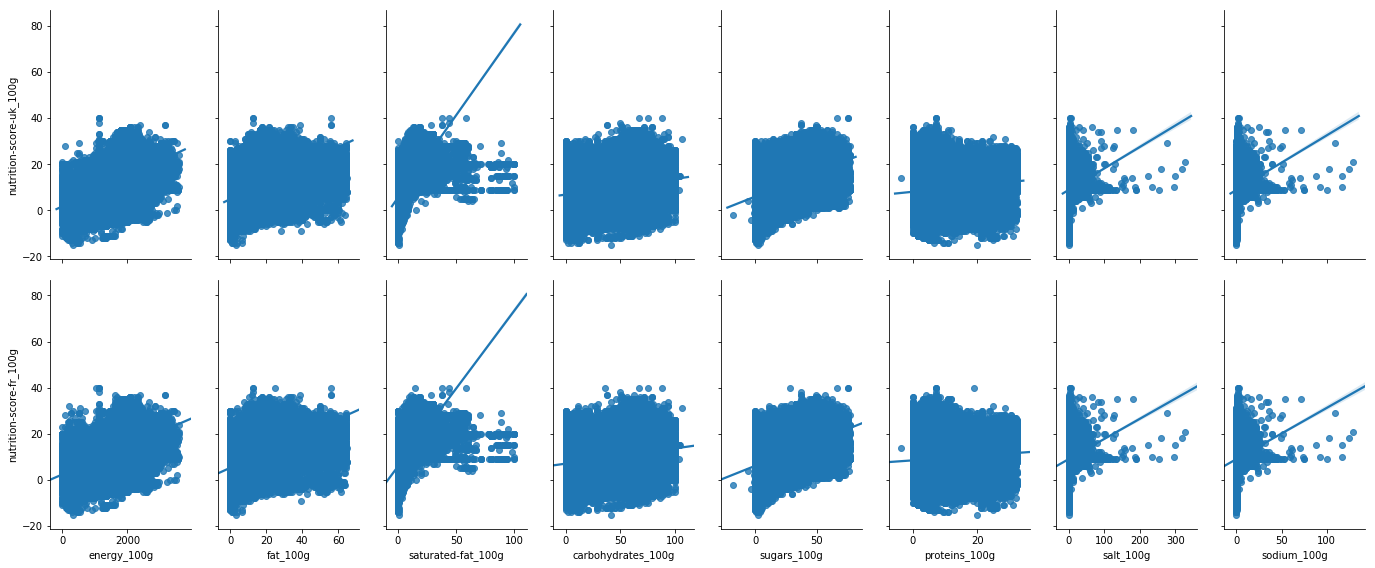

In [168]:
#visualise findings
sns.pairplot(df, x_vars = ['energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g'], y_vars = ['nutrition-score-uk_100g', 'nutrition-score-fr_100g'], height=4, aspect=0.6, kind='reg')
plt.show()